In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from neuron import h, load_mechanisms
from netpyne import specs, sim, cell, support

In [2]:
h.load_file("stdrun.hoc")

cwd = os.getcwd()
mod_dir = os.path.join(cwd, 'mod')
load_mechanisms(mod_dir)

True

### Simulation configuration

In [3]:
sim_dur = 50

In [4]:
cfg = specs.SimConfig()					                    # object of class SimConfig to store simulation configuration
cfg.duration = sim_dur 						                # Duration of the simulation, in ms
cfg.dt = 0.1								                # Internal integration timestep to use
cfg.verbose = True							                # Show detailed messages
cfg.recordTraces = {'V_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'v'}}
cfg.recordStep = 0.1
# cfg.recordStim = True
cfg.filename = os.path.join(cwd, 'output', 'tinnitus_small-net') 	# Set file output name
cfg.savePickle = True
cfg.analysis['plotTraces'] = {'include': ['all'], 'saveFig': True}  # Plot recorded traces for this list of cells
cfg.hParams['celsius'] = 34.0 
cfg.hParams['v_init'] = -60

In [5]:
netParams = specs.NetParams()

### Cell parameters

RS - Layer 5 regular spiking pyramidal cell (fig 8.12 from 2007
    	book) Parameters: C=1; k=0.7; vr=-60; vt=-40; vpeak=35;
    	a=0.03; b=-2; c=-50; d=100; celltype=1 Book fig: T = 520 ms;
    	IinRange = [60,70,85,100] pA

In [6]:
soma = {'geom': {}, 'mechs': {}, 'pointps': {}}
soma['geom'] = {'diam': 50, 'L': 50, 'Ra': 35.4, 'cm': 1}
soma['vinit'] = -60
soma['threshold'] = -10
soma['pointps']['Izh2007b'] = {
    'mod': 'Izhi2007b', 
    'loc': 0.5,
    'C': 1,            # capacitance
    'k': 0.7,
    'vr': -60,         # resting potential
    'vt': -55,         # threshold potential
    'vpeak': 0,
    'a': 0.03,         # recovery time constant, 1 / (inactivation time constant of I_A)
    'b': -2,
    'c': -55,         # repolarizies to
    'd': 100,
    'celltype': 1}


netParams.cellParams['IzhCell'] = {
    'secs': {'soma': soma}
}

### Cell populations

In [7]:
# netParams.popParams['input'] = {'cellModel': 'VecStim',
#                                 'numCells': 1,
#                                 'spikePattern': {'type': 'poisson',
#                                                  'start': 0,
#                                                  'stop': 1000,
#                                                  'frequency': 200}}

pop_labels = ['SGN']  #, 'Int', 'IC', 'Fusi1', 'Fusi2']

for pop_label in pop_labels:
    netParams.popParams[f'{pop_label}_pop'] = {'cellType': 'IzhCell',
                                               'numCells': 1}
    


In [8]:
netParams.stimSourceParams['IClamp0'] = {'type': 'IClamp', 'del': 0, 'dur': sim_dur, 'amp': 0.5}
netParams.stimTargetParams['IClamp->SGN'] = {'source': 'IClamp0', 'sec': 'soma', 'loc': 0.5, 'conds': {'cellList': [0]}}

### Synapses

In [9]:
netParams.synMechParams['exc'] = {'mod': 'ExpSyn', 'tau': 3, 'e': -10}
netParams.synMechParams['inh'] = {'mod': 'ExpSyn', 'tau': 10, 'e': -70}

### Connections

In [10]:
# netParams.connParams[f'input->SGN'] = {
#     'preConds': {'pop': 'input'},
#     'postConds': {'pop': 'SGN_pop'},
#     'synsPerConn': 1,
#     'synMech': 'exc',
#     'weight': 1
# }

# netParams.connParams[f'SGN->Fusi1'] = {
#     'preConds': {'pop': 'SGN_pop'},
#     'postConds': {'pop': 'Fusi1_pop'},
#     'probability': 1,
#     'synsPerConn': 1,
#     'synMech': 'exc',
#     'weight': 1
# }

# netParams.connParams[f'SGN->Fusi2'] = {
#     'preConds': {'pop': 'SGN_pop'},
#     'postConds': {'pop': 'Fusi2_pop'},
#     'synsPerConn': 1,
#     'synMech': 'exc',
#     'weight': 1
# }

# netParams.connParams[f'Fusi1->IC'] = {
#     'preConds': {'pop': 'Fusi1_pop'},
#     'postConds': {'pop': 'IC_pop'},
#     'synsPerConn': 1,
#     'synMech': 'exc',
#     'weight': 1
# }

# netParams.connParams[f'IC->Fusi1'] = {
#     'preConds': {'pop': 'IC_pop'},
#     'postConds': {'pop': 'Fusi1_pop'},
#     'synsPerConn': 1,
#     'synMech': 'exc',
#     'weight': 1
# }

# netParams.connParams[f'Fusi2->IC'] = {
#     'preConds': {'pop': 'Fusi2_pop'},
#     'postConds': {'pop': 'IC_pop'},
#     'synsPerConn': 1,
#     'synMech': 'exc',
#     'weight': 1
# }

# netParams.connParams[f'IC->Fusi2'] = {
#     'preConds': {'pop': 'IC_pop'},
#     'postConds': {'pop': 'Fusi2_pop'},
#     'synsPerConn': 1,
#     'synMech': 'exc',
#     'weight': 1
# }

# netParams.connParams[f'IC->Int'] = {
#     'preConds': {'pop': 'IC_pop'},
#     'postConds': {'pop': 'Int_pop'},
#     'synsPerConn': 1,
#     'synMech': 'exc',
#     'weight': 1
# }

# netParams.connParams[f'Int->Fusi2'] = {
#     'preConds': {'pop': 'Int_pop'},
#     'postConds': {'pop': 'Fusi2_pop'},
#     'synsPerConn': 1,
#     'synMech': 'inh',
#     'weight': 1
# }
# netParams.connParams[f'Int->Fusi1'] = {
#     'preConds': {'pop': 'Int_pop'},
#     'postConds': {'pop': 'Fusi1_pop'},
#     'synsPerConn': 1,
#     'synMech': 'inh',
#     'weight': 1
# }


### Simulate


Start time:  2024-09-16 20:56:38.239212

Creating network of 1 cell populations on 1 hosts...
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=0) of pop SGN_pop, on node 0, 
Instantiated 1 cells of population SGN_pop
  Number of cells on node 0: 1 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Added IClamp0 IClamp to cell gid=0, sec=soma, loc=0.5, del=0, dur=50, amp=0.5
  Number of stims on node 0: 1 
  Done; cell stims creation time = 0.00 s.
  Recording  V_soma from cell  0  with parameters:  {'sec': 'soma', 'loc': 0.5, 'var': 'v'}
Vector[2]
   Recording: spkt:
   Recording: spkid:
   Recording: V_soma:
      cell_0
   Recording: t:
Recording 1 traces of 1 types on node 0

Setting h global variables ...
  h.celsius = 34.0
  h.v_init = -60
  h.clamp_resist = 0.001
  h.tstop = 50.0
Minimum delay (time-step for queue exchange) is 10.00

Running simula

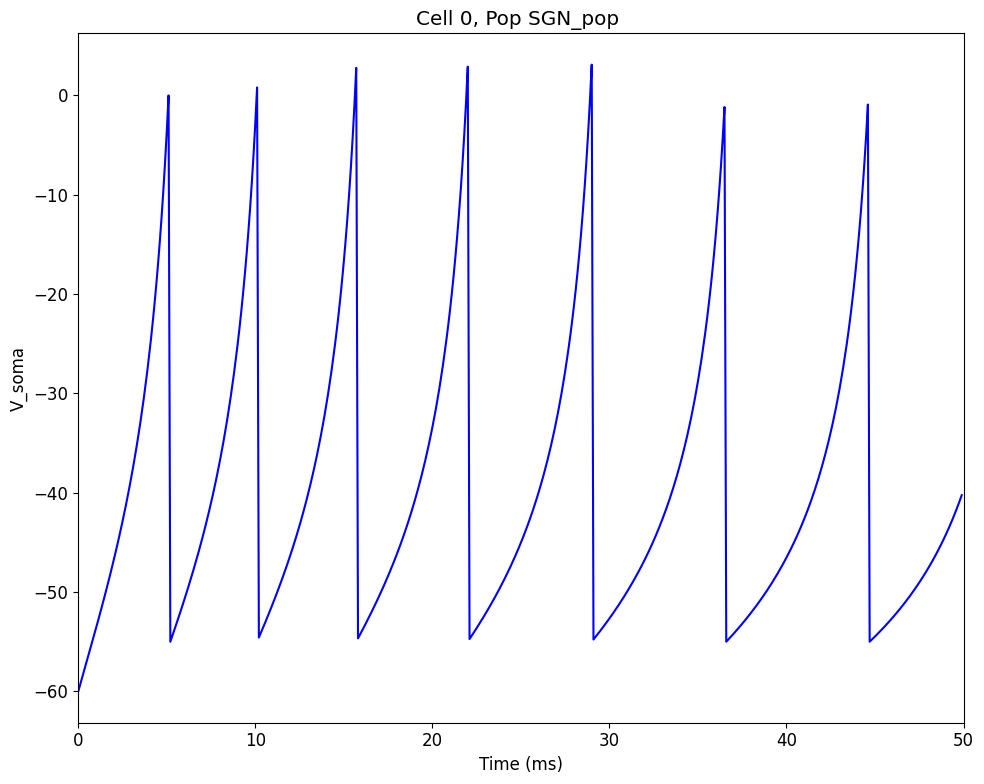

  Done; plotting time = 0.29 s

Total time = 0.31 s


In [11]:
%matplotlib inline
(pops, cells, conns, stims, simData) = sim.createSimulateAnalyze(netParams=netParams, simConfig=cfg, output=True)

In [12]:
temp = 5

SGN_pop: 7 spikes


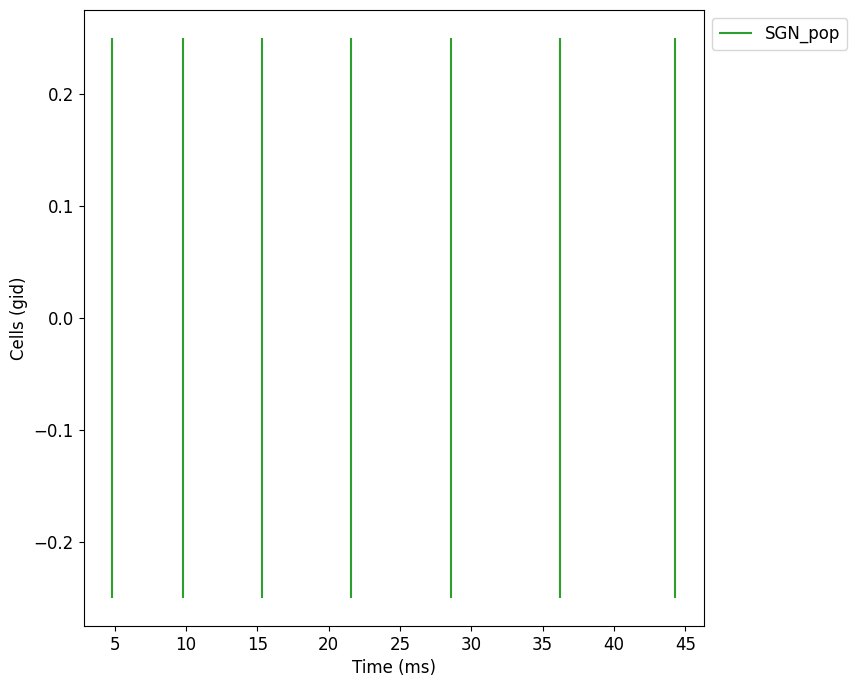

In [13]:
times = np.array(simData['spkt'])
spikes = np.array(simData['spkid'])

colors = {'SGN_pop': 'tab:green', 'Int_pop': 'tab:blue', 'IC_pop': 'tab:purple', 'Fusi1_pop': 'tab:red', 'Fusi2_pop': 'tab:red', 'input': 'tab:cyan'}

fig, axs = plt.subplots(1, 1, figsize=(8,8))

input_spike_t = []

for pop_label, pop in pops.items():
    for gid in pop.cellGids:
        cell = cells[gid]
        spike_times = times[np.where(spikes == gid)]
        if gid == 0:
            input_spike_t = spike_times

        # loc = -1 if gid == 5 else gid
        axs.vlines(spike_times, gid-0.25, gid+0.25, color=colors[pop_label], label=pop_label)

        print(f'{pop_label}: {spike_times.shape[0]} spikes')


axs.legend(loc='upper left', bbox_to_anchor=(1, 1))
# axs.set_yticks([-1, 0, 1, 2, 3, 4])
# axs.set_yticklabels(['5','0','1','2','3', '4'])
axs.set_ylabel('Cells (gid)')
axs.set_xlabel('Time (ms)');

In [14]:
save_inputs = False

if save_inputs:

    in_amp = 3

    t_int = np.arange(0,250,0.1)
    input_spike_ts = [round(input_spike, 1) for input_spike in input_spike_t]
    for input_spike in input_spike_ts:
        t_int[int(input_spike*10)] = in_amp
    t_int[np.where(t_int != in_amp)] = 0
    t_int[int(in_amp*10)] = 0
    np.savetxt(f'inputs_{in_amp}.txt',t_int)
